#**First Lambda Build Week**

#####**Importing Data**

In [0]:
"""The files for this project can be found at https://github.com/repoocsov/Build_Week_1"""

# Import Pandas and save data to Pandas Dataframe
import pandas as pd

# Human Freedom Index dataframe
human_freedom_index = pd.read_csv('human_freedom_index.csv')

# Local Bitcoins volume dataframe
local_bitcoins = pd.read_csv('local_bitcoins_volume.csv', header=None)

#**Data Cleaning**


#####***Human Freedom Index***

In [2]:
# Looking at the shape of the data
human_freedom_index.shape

(1458, 123)

In [0]:
# Renaming columns
human_freedom_index.rename(columns={'countries':'Country', 'ISO_code':'Country Code'}, inplace=True)

In [4]:
# Selecting only the instances with the year 2016
conditional = human_freedom_index['year'] == 2016
human_freedom_index_2016 = human_freedom_index[conditional]
human_freedom_index_2016

,year,Country Code,Country,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,...,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,10.0,10.000000,10.000000,10.000000,10.0,7.5,5.0,5.0,5.0,7.500000,8.806810,5.0,10.0,5.0,6.666667,NaN,NaN,10.0,9.566667,8.011111,9.192593,10.0,10.0,NaN,NaN,10.0,NaN,NaN,10.0,...,9.74360,10.0,9.553657,9.626667,9.24,8.0240,8.963556,5.574481,9.405328,7.489905,10.00000,6.306106,4.615385,8.296923,6.406138,8.214900,5.0,7.295687,9.0,7.098562,5.566667,5.396399,6.234861,8.0,6.299741,10.0,6.916278,6.072172,6.000000,9.713864,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,5.0,9.926119,9.990149,8.842060,10.0,7.5,0.0,0.0,0.0,5.833333,8.043882,5.0,5.0,5.0,5.000000,NaN,NaN,5.0,6.873333,2.961111,4.944815,5.0,5.0,NaN,NaN,5.0,NaN,NaN,5.0,...,8.72046,5.0,7.253894,8.480000,6.22,5.9176,6.872533,4.962589,0.000000,2.481294,5.56391,3.664829,0.000000,1.106256,1.590362,4.127025,0.0,5.301526,10.0,5.100509,5.566667,3.896912,5.958321,6.0,7.755176,1.0,5.029513,3.722341,1.777778,9.243070,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,7.5,10.000000,10.000000,8.500000,10.0,10.0,5.0,5.0,5.0,8.333333,8.297865,0.0,5.0,10.0,5.000000,NaN,NaN,10.0,8.904444,7.455556,8.786667,2.5,2.5,NaN,NaN,2.5,NaN,NaN,5.0,...,3.05400,5.0,5.606605,8.993333,7.72,4.2544,6.989244,3.132738,0.917160,2.024949,10.00000,2.946919,3.076923,0.110626,2.044823,5.264754,8.0,9.194715,4.0,7.064905,8.900000,2.656198,5.172987,4.0,6.632764,0.0,4.560325,2.758428,1.333333,8.664627,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,7.5,10.000000,9.990877,9.498175,10.0,10.0,10.0,10.0,10.0,10.000000,9.040383,10.0,10.0,10.0,10.000000,NaN,NaN,7.5,9.037778,6.850000,7.795926,7.5,10.0,NaN,NaN,5.0,NaN,NaN,7.5,...,2.00000,10.0,5.614336,6.060000,7.26,5.9448,6.421600,4.466582,5.155629,4.811105,0.00000,5.358169,0.769231,7.965046,4.697482,3.982547,5.0,4.259461,7.0,5.419820,2.766667,2.191898,3.432613,10.0,2.517254,10.0,5.151405,2.404211,6.666667,9.122357,3.260044,5.

In [5]:
# Subsetting the dataframe
human_freedom_index_2016 = human_freedom_index_2016[['Country', 'Country Code', 'pf_association_association','pf_association_assembly',
                                                     'pf_association_political', 'pf_association', 'pf_score', 'ef_legal_restrictions',
                                                     'ef_money_growth','ef_money_sd', 'ef_money_currency',
                                                     'ef_money', 'ef_trade_movement_capital','ef_trade_movement', 'ef_trade', 'ef_regulation_credit_ownership']]
human_freedom_index_2016


"""
NOTE: This dataframe was more so for exploration purposes. I took the columns that I believed were most likely to be influential on Bitcoin volume. A different subset is used and created below.
"""

,Country,Country Code,pf_association_association,pf_association_assembly,pf_association_political,pf_association,pf_score,ef_legal_restrictions,ef_money_growth,ef_money_sd,ef_money_currency,ef_money,ef_trade_movement_capital,ef_trade_movement,ef_trade,ef_regulation_credit_ownership
0,Albania,ALB,10.0,10.0,10.0,10.0,7.596281,6.485287,8.986454,9.484575,10.0,9.553657,4.615385,6.406138,8.214900,5.0
1,Algeria,DZA,5.0,5.0,5.0,5.0,5.281772,6.626692,6.955962,8.339152,5.0,7.253894,0.000000,1.590362,4.127025,0.0
2,Angola,AGO,2.5,2.5,2.5,4.0,6.111324,5.455882,9.385679,4.986742,5.0,5.606605,3.076923,2.044823,5.264754,8.0
3,Argentina,ARG,7.5,10.0,5.0,7.5,8.099696,6.857195,5.233264,5.224079,10.0,5.614336,0.769231,4.697482,3.982547,5.0
4,Armenia,ARM,7.5,7.5,5.0,6.5,6.912804,9.801963,9.078264,9.263496,10.0,9.521940,5.384615,6.830998,8.143241,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Venezuela,VEN,10.0,10.0,2.5,6.5,5.521449,8.129719,2.768404,0.000000,5.0,1.942101,0.769231,3.693936,3.281311,5.0
158,Vietnam,VNM,2.5,2.5,0.0,1.5,5.968008,8.716067,8.252161,8.272372,0.0,6.468943,0.769231,2.239655,6.276207,NaN
159,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,2.166555,9.049234,9.906750,7.269562,10.0,9.044078,6.923077,3.493863,6.683847,NaN
160,Zambia,ZMB,NaN,NaN,NaN,NaN,6.007699,5.895293,8.067194,8.558390,10.0,8.262901,9.230769,8.707999,6.972247,5.0


#####***Local Bitcoins***

In [6]:
# Removing null value rows
local_bitcoins = local_bitcoins.drop(local_bitcoins.index[0])
local_bitcoins = local_bitcoins.drop(local_bitcoins.index[0])

local_bitcoins.head()

,0,1,2,3,4,5,6
2,Country,Continent,Native Currency,FX Rate,USD Value,Percentage,Notes
3,🇦🇷 Argentina,South America,"244,273,785.00",0.036,"$8,793,856.26",0.14%,NaN
4,🇦🇺 Australia,Australia,"254,692,234.00",0.73,"$185,925,330.82",2.94%,NaN
5,🇧🇷 Brazil,South America,"114,069,866.00",0.26,"$29,658,165.16",0.47%,NaN
6,🇨🇦 Canada,North America,"133,970,541.00",0.75,"$100,477,905.75",1.59%,NaN


In [7]:
# Specifying column headers and then moving the header row
local_bitcoins = local_bitcoins.rename(columns=local_bitcoins.iloc[0])
local_bitcoins = local_bitcoins.drop(local_bitcoins.index[0])

local_bitcoins.head()

,Country,Continent,Native Currency,FX Rate,USD Value,Percentage,Notes
3,🇦🇷 Argentina,South America,"244,273,785.00",0.036,"$8,793,856.26",0.14%,NaN
4,🇦🇺 Australia,Australia,"254,692,234.00",0.73,"$185,925,330.82",2.94%,NaN
5,🇧🇷 Brazil,South America,"114,069,866.00",0.26,"$29,658,165.16",0.47%,NaN
6,🇨🇦 Canada,North America,"133,970,541.00",0.75,"$100,477,905.75",1.59%,NaN
7,🇨🇱 Chile,South America,"6,969,942,308.00",0.0015,"$10,454,913.46",0.17%,NaN


In [8]:
# Dropping the 'Notes' column
local_bitcoins = local_bitcoins.drop('Notes', axis=1)
local_bitcoins.head()

,Country,Continent,Native Currency,FX Rate,USD Value,Percentage
3,🇦🇷 Argentina,South America,"244,273,785.00",0.036,"$8,793,856.26",0.14%
4,🇦🇺 Australia,Australia,"254,692,234.00",0.73,"$185,925,330.82",2.94%
5,🇧🇷 Brazil,South America,"114,069,866.00",0.26,"$29,658,165.16",0.47%
6,🇨🇦 Canada,North America,"133,970,541.00",0.75,"$100,477,905.75",1.59%
7,🇨🇱 Chile,South America,"6,969,942,308.00",0.0015,"$10,454,913.46",0.17%


In [9]:
# Resetting the index
local_bitcoins = local_bitcoins.reset_index()
local_bitcoins

,index,Country,Continent,Native Currency,FX Rate,USD Value,Percentage
0,3,🇦🇷 Argentina,South America,"244,273,785.00",0.036,"$8,793,856.26",0.14%
1,4,🇦🇺 Australia,Australia,"254,692,234.00",0.73,"$185,925,330.82",2.94%
2,5,🇧🇷 Brazil,South America,"114,069,866.00",0.26,"$29,658,165.16",0.47%
3,6,🇨🇦 Canada,North America,"133,970,541.00",0.75,"$100,477,905.75",1.59%
4,7,🇨🇱 Chile,South America,"6,969,942,308.00",0.0015,"$10,454,913.46",0.17%
5,8,🇨🇳 China,Asia,"4,144,788,613.00",0.15,"$621,718,291.95",9.83%
6,9,🇨🇴 Colombia,South America,"191,729,200,301.00",0.00034,"$65,187,928.10",1.03%
7,10,🇭🇷 Croatia,Europe,"21,760,001.00",0.16,"$3,481,600.16",0.06%
8,11,🇨🇿 Czech Republic,Europe,"95,110,449.00",0.045,"$4,279,970.21",0.07%
9,12,🇩🇰 Denmark,Europe,"27,742,917.00",0.16,"$4,438,866.72",0.07%


In [10]:
# Dropping the old index
local_bitcoins = local_bitcoins.drop('index', axis=1)
local_bitcoins.head()

,Country,Continent,Native Currency,FX Rate,USD Value,Percentage
0,🇦🇷 Argentina,South America,"244,273,785.00",0.036,"$8,793,856.26",0.14%
1,🇦🇺 Australia,Australia,"254,692,234.00",0.73,"$185,925,330.82",2.94%
2,🇧🇷 Brazil,South America,"114,069,866.00",0.26,"$29,658,165.16",0.47%
3,🇨🇦 Canada,North America,"133,970,541.00",0.75,"$100,477,905.75",1.59%
4,🇨🇱 Chile,South America,"6,969,942,308.00",0.0015,"$10,454,913.46",0.17%


In [11]:
# Looking at one country
local_bitcoins['Country'][0]

'🇦🇷 Argentina'

In [12]:
# Removing the first 3 letters from each value in the 'Country column'
local_bitcoins['Country'] = local_bitcoins['Country'].str[3:]
local_bitcoins.head()

,Country,Continent,Native Currency,FX Rate,USD Value,Percentage
0,Argentina,South America,"244,273,785.00",0.036,"$8,793,856.26",0.14%
1,Australia,Australia,"254,692,234.00",0.73,"$185,925,330.82",2.94%
2,Brazil,South America,"114,069,866.00",0.26,"$29,658,165.16",0.47%
3,Canada,North America,"133,970,541.00",0.75,"$100,477,905.75",1.59%
4,Chile,South America,"6,969,942,308.00",0.0015,"$10,454,913.46",0.17%


In [13]:
# Looking at types (the last 4 columns should be numeric)
local_bitcoins.dtypes

Country            object
Continent          object
Native Currency    object
FX Rate            object
USD Value          object
Percentage         object
dtype: object

In [0]:
# Changing Native currency to numeric type
local_bitcoins['Native Currency'] = local_bitcoins['Native Currency'].str.replace(",","")
local_bitcoins['Native Currency'] = local_bitcoins['Native Currency'].str.replace("$","").astype(float)

In [15]:
local_bitcoins.dtypes

Country             object
Continent           object
Native Currency    float64
FX Rate             object
USD Value           object
Percentage          object
dtype: object

In [16]:
local_bitcoins.head()

,Country,Continent,Native Currency,FX Rate,USD Value,Percentage
0,Argentina,South America,2.442738e+08,0.036,"$8,793,856.26",0.14%
1,Australia,Australia,2.546922e+08,0.73,"$185,925,330.82",2.94%
2,Brazil,South America,1.140699e+08,0.26,"$29,658,165.16",0.47%
3,Canada,North America,1.339705e+08,0.75,"$100,477,905.75",1.59%
4,Chile,South America,6.969942e+09,0.0015,"$10,454,913.46",0.17%


In [0]:
# Changing FX Rate
local_bitcoins = local_bitcoins.drop(local_bitcoins.index[46])
local_bitcoins['FX Rate'] = pd.to_numeric(local_bitcoins['FX Rate'])

In [0]:
# Changing 'USD Value' to numeric type
local_bitcoins['USD Value'] = local_bitcoins['USD Value'].str.replace(",","")
local_bitcoins['USD Value'] = local_bitcoins['USD Value'].str.replace("$","").astype(float)

In [19]:
local_bitcoins.head()

,Country,Continent,Native Currency,FX Rate,USD Value,Percentage
0,Argentina,South America,2.442738e+08,0.0360,8.793856e+06,0.14%
1,Australia,Australia,2.546922e+08,0.7300,1.859253e+08,2.94%
2,Brazil,South America,1.140699e+08,0.2600,2.965817e+07,0.47%
3,Canada,North America,1.339705e+08,0.7500,1.004779e+08,1.59%
4,Chile,South America,6.969942e+09,0.0015,1.045491e+07,0.17%


In [0]:
# Changing 'Percentage' to numeric type
local_bitcoins['Percentage'] = local_bitcoins['Percentage'].str.replace("%","").astype(float)

In [0]:
local_bitcoins['Percentage'] = local_bitcoins['Percentage'] / 100

In [22]:
local_bitcoins

,Country,Continent,Native Currency,FX Rate,USD Value,Percentage
0,Argentina,South America,2.442738e+08,0.036000,8.793856e+06,0.0014
1,Australia,Australia,2.546922e+08,0.730000,1.859253e+08,0.0294
2,Brazil,South America,1.140699e+08,0.260000,2.965817e+07,0.0047
3,Canada,North America,1.339705e+08,0.750000,1.004779e+08,0.0159
4,Chile,South America,6.969942e+09,0.001500,1.045491e+07,0.0017
5,China,Asia,4.144789e+09,0.150000,6.217183e+08,0.0983
6,Colombia,South America,1.917292e+11,0.000340,6.518793e+07,0.0103
7,Croatia,Europe,2.176000e+07,0.160000,3.481600e+06,0.0006
8,Czech Republic,Europe,9.511045e+07,0.045000,4.279970e+06,0.0007
9,Denmark,Europe,2.774292e+07,0.160000,4.438867e+06,0.0007


In [23]:
# Checking dtypes
local_bitcoins.dtypes

Country             object
Continent           object
Native Currency    float64
FX Rate            float64
USD Value          float64
Percentage         float64
dtype: object

In [0]:
# Renaming column headers
local_bitcoins.columns = ['Country', 'Continent', 'LB_Native_Currency', 'LB_FX_Rate', 'LB_USD_Value', 'LB_Percentage']

In [0]:
# Adding 'Country Code' column so that we can merge our dataframes
#  KEN MYS  MEX MAR
local_bitcoins['Country Code'] = ['ARG', 'AUS', 'BRA', 'CAN', 'CHL','CHN', 'COL', 'HRV', 'CZE', 'DNK','DOM', 'HNK', 'HUN', 'IND', 'IDN','IRN', 'JPN', 'KAZ', 'KEN', 'MYS', 'MEX', 'MAR', 'NZL', 'NGA', 'NOR', 'PAK', 'PER', 'PHL', 'POL', 'ROU', 'RUS', 'SAU', 'SGP', 'ZAF', 'SWE',
                                  'CHE', 'TZA','THA', 'TUR', 'UKR', 'ARE', 'GBR', 'USA', 'VEN',
                                  'VNM','']

In [26]:
# Adding a population column
local_bitcoins['population'] = [43000000, 24210000, 207700000, 35150000, 17910000, 1379000000, 48650000, 4154213, 10550000, 5800000, 10650000, 7337000, 1760000, 1324000000, 261100000,
                                80280000, 127000000, 17790000, 48460000, 31190000, 127500000, 35280000, 4693000 , 186000000, 5250950, 193200000, 31770000, 103300000, 37970000,
                                19760000, 144300000, 32280000, 5607000, 56020000, 9851000, 8400000, 55570000, 68860000, 78740000, 42590000, 9270000, 65650000, 323400000, 31570000, 94570000, 0]
local_bitcoins.head()

,Country,Continent,LB_Native_Currency,LB_FX_Rate,LB_USD_Value,LB_Percentage,Country Code,population
0,Argentina,South America,2.442738e+08,0.0360,8.793856e+06,0.0014,ARG,43000000
1,Australia,Australia,2.546922e+08,0.7300,1.859253e+08,0.0294,AUS,24210000
2,Brazil,South America,1.140699e+08,0.2600,2.965817e+07,0.0047,BRA,207700000
3,Canada,North America,1.339705e+08,0.7500,1.004779e+08,0.0159,CAN,35150000
4,Chile,South America,6.969942e+09,0.0015,1.045491e+07,0.0017,CHL,17910000


In [27]:
# Creating local bitcoin volume per person feature
local_bitcoins['LB_volume_per_person'] = local_bitcoins['LB_USD_Value'] / local_bitcoins['population']
local_bitcoins

"""NOTE: Rest of Europe is vague and will get removed upon merging of dataframes"""

,Country,Continent,LB_Native_Currency,LB_FX_Rate,LB_USD_Value,LB_Percentage,Country Code,population,LB_volume_per_person
0,Argentina,South America,2.442738e+08,0.036000,8.793856e+06,0.0014,ARG,43000000,0.204508
1,Australia,Australia,2.546922e+08,0.730000,1.859253e+08,0.0294,AUS,24210000,7.679691
2,Brazil,South America,1.140699e+08,0.260000,2.965817e+07,0.0047,BRA,207700000,0.142793
3,Canada,North America,1.339705e+08,0.750000,1.004779e+08,0.0159,CAN,35150000,2.858546
4,Chile,South America,6.969942e+09,0.001500,1.045491e+07,0.0017,CHL,17910000,0.583747
5,China,Asia,4.144789e+09,0.150000,6.217183e+08,0.0983,CHN,1379000000,0.450847
6,Colombia,South America,1.917292e+11,0.000340,6.518793e+07,0.0103,COL,48650000,1.339937
7,Croatia,Europe,2.176000e+07,0.160000,3.481600e+06,0.0006,HRV,4154213,0.838089
8,Czech Republic,Europe,9.511045e+07,0.045000,4.279970e+06,0.0007,CZE,10550000,0.405684
9,Denmark,Europe,2.774292e+07,0.160000,4.438867e+06,0.0007,DNK,5800000,0.765322


#####**Merging Subsets**

In [28]:
human_freedom_index_2016.shape
# Data on 162 countries

(162, 16)

In [29]:
local_bitcoins.shape
# Data on 46 countries

(46, 9)

In [30]:
df = pd.merge(left=human_freedom_index_2016, right=local_bitcoins, left_on='Country Code', right_on='Country Code')
df.shape

(44, 24)

In [31]:
df.head()

,Country_x,Country Code,pf_association_association,pf_association_assembly,pf_association_political,pf_association,pf_score,ef_legal_restrictions,ef_money_growth,ef_money_sd,ef_money_currency,ef_money,ef_trade_movement_capital,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,Country_y,Continent,LB_Native_Currency,LB_FX_Rate,LB_USD_Value,LB_Percentage,population,LB_volume_per_person
0,Argentina,ARG,7.5,10.0,5.0,7.5,8.099696,6.857195,5.233264,5.224079,10.0,5.614336,0.769231,4.697482,3.982547,5.0,Argentina,South America,2.442738e+08,0.0360,8.793856e+06,0.0014,43000000,0.204508
1,Australia,AUS,10.0,10.0,10.0,10.0,9.184438,8.205655,8.564838,9.500704,10.0,9.452540,4.615385,3.859781,7.526721,10.0,Australia,Australia,2.546922e+08,0.7300,1.859253e+08,0.0294,24210000,7.679691
2,Brazil,BRA,10.0,10.0,2.5,6.5,6.665977,8.354688,9.103945,9.532097,5.0,7.972060,2.307692,5.230938,7.000291,5.0,Brazil,South America,1.140699e+08,0.2600,2.965817e+07,0.0047,207700000,0.142793
3,Canada,CAN,10.0,10.0,10.0,10.0,9.151727,8.971140,8.992625,9.610223,10.0,9.579712,7.692308,6.747176,7.929248,10.0,Canada,North America,1.339705e+08,0.7500,1.004779e+08,0.0159,35150000,2.858546
4,Chile,CHL,10.0,10.0,10.0,10.0,8.216035,9.066918,8.713568,9.369286,10.0,9.331413,3.076923,6.573816,8.268563,8.0,Chile,South America,6.969942e+09,0.0015,1.045491e+07,0.0017,17910000,0.583747


In [32]:
# Dropping the redundant country columns, continent column
df = df.drop(['Country Code', 'Country_y',  'LB_Native_Currency', 'LB_FX_Rate'], axis=1)
df.columns

Index(['Country_x', 'pf_association_association', 'pf_association_assembly',
       'pf_association_political', 'pf_association', 'pf_score',
       'ef_legal_restrictions', 'ef_money_growth', 'ef_money_sd',
       'ef_money_currency', 'ef_money', 'ef_trade_movement_capital',
       'ef_trade_movement', 'ef_trade', 'ef_regulation_credit_ownership',
       'Continent', 'LB_USD_Value', 'LB_Percentage', 'population',
       'LB_volume_per_person'],
      dtype='object')

In [33]:
# Renaming the country column and removing scientific notation
df.rename(columns={'Country_x':'Country'}, inplace=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.head(1)

,Country,pf_association_association,pf_association_assembly,pf_association_political,pf_association,pf_score,ef_legal_restrictions,ef_money_growth,ef_money_sd,ef_money_currency,ef_money,ef_trade_movement_capital,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,Continent,LB_USD_Value,LB_Percentage,population,LB_volume_per_person
0,Argentina,7.50000,10.00000,5.00000,7.50000,8.09970,6.85720,5.23326,5.22408,10.00000,5.61434,0.76923,4.69748,3.98255,5.00000,South America,8793856.26000,0.00140,43000000,0.20451


#**Data Exploration**

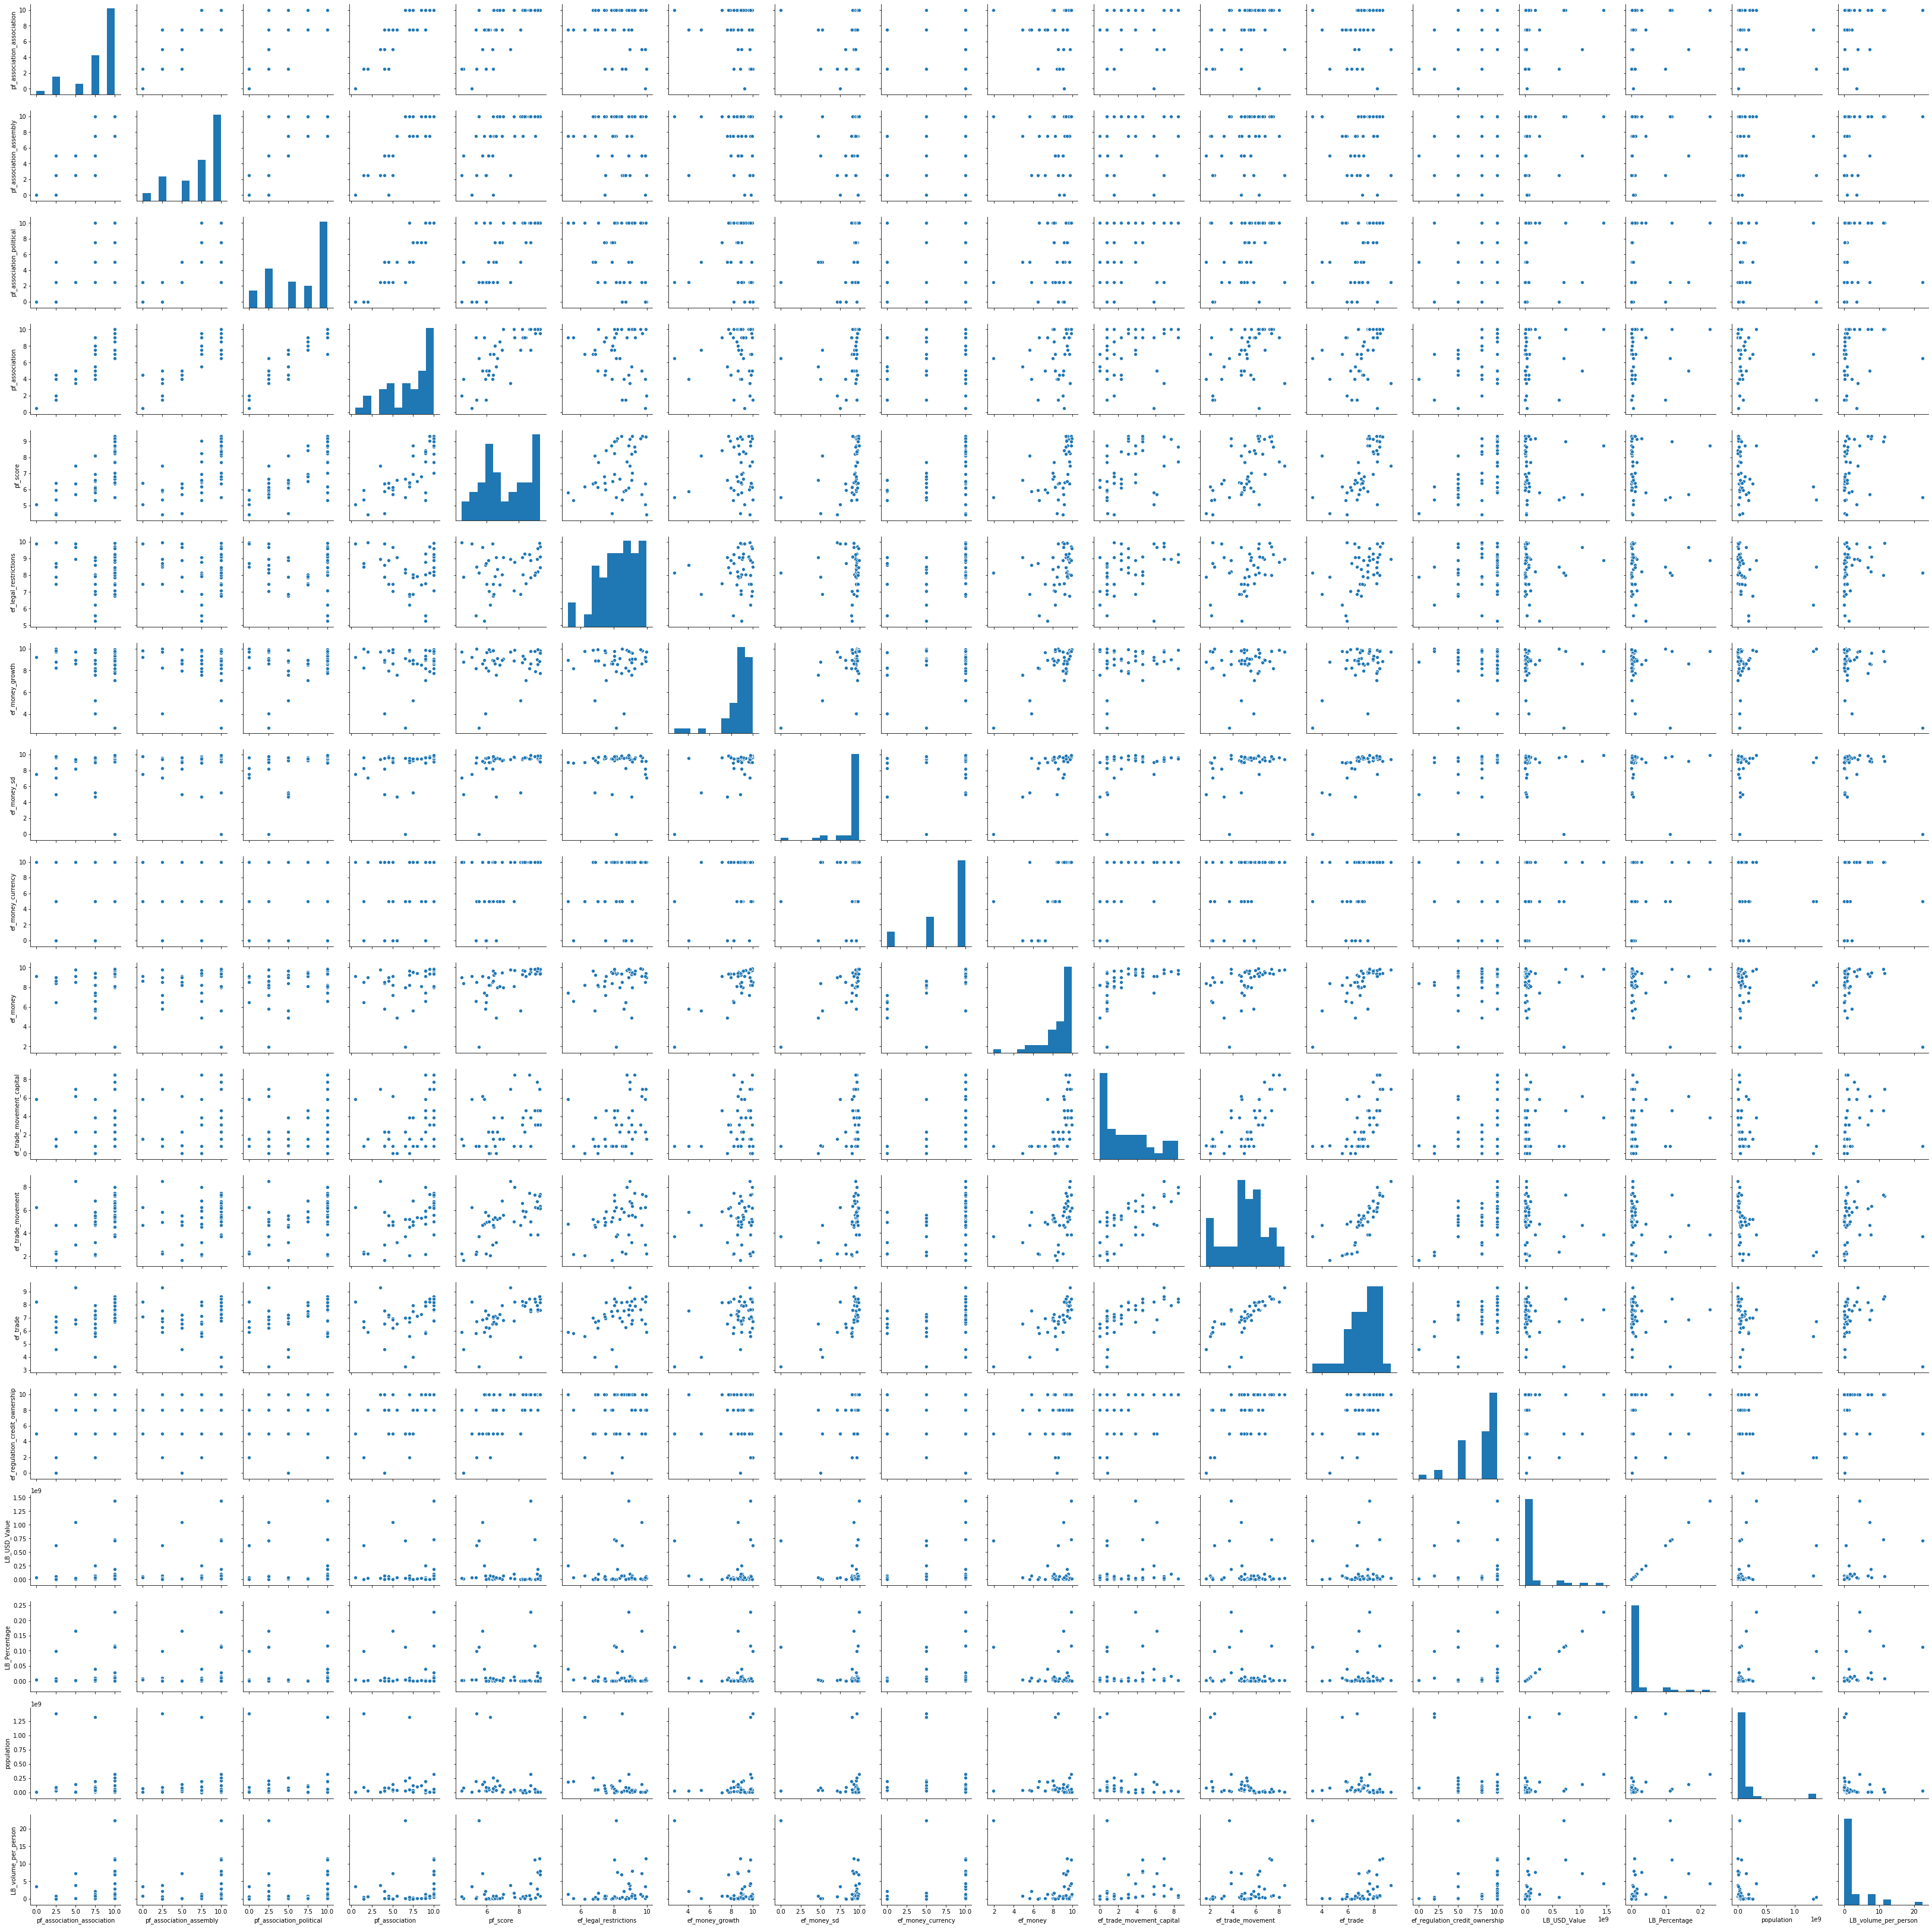

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pairplot using seaborns
sns.pairplot(df)
plt.show()

In [35]:
# correlation matrix
df.corr()

,pf_association_association,pf_association_assembly,pf_association_political,pf_association,pf_score,ef_legal_restrictions,ef_money_growth,ef_money_sd,ef_money_currency,ef_money,ef_trade_movement_capital,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,LB_USD_Value,LB_Percentage,population,LB_volume_per_person
pf_association_association,1.00000,0.87680,0.74615,0.87574,0.70417,-0.12821,-0.11622,0.23191,0.19651,0.13485,0.20125,0.45740,0.27001,0.51660,-0.00388,-0.00376,-0.21941,0.18638
pf_association_assembly,0.87680,1.00000,0.76179,0.87311,0.67396,-0.09464,-0.10825,0.04761,0.32087,0.11645,0.17409,0.27661,0.09165,0.31249,0.06377,0.06385,-0.13547,0.22450
pf_association_political,0.74615,0.76179,1.00000,0.93665,0.72005,-0.13348,0.15573,0.35897,0.31268,0.37730,0.34452,0.38510,0.35432,0.46571,-0.03219,-0.03208,-0.10773,0.04235
pf_association,0.87574,0.87311,0.93665,1.00000,0.77080,-0.14472,0.03604,0.29958,0.30033,0.28017,0.32936,0.44049,0.30292,0.54426,0.03396,0.03408,-0.22410,0.16349
pf_score,0.70417,0.67396,0.72005,0.77080,1.00000,0.23177,0.10446,0.39373,0.47507,0.46318,0.46950,0.61772,0.59730,0.59775,-0.01391,-0.01375,-0.27360,0.16788
ef_legal_restrictions,-0.12821,-0.09464,-0.13348,-0.14472,0.23177,1.00000,0.08496,-0.00426,0.35377,0.26552,0.37512,0.28946,0.42617,0.09610,0.09145,0.09143,-0.26403,0.19712
ef_money_growth,-0.11622,-0.10825,0.15573,0.03604,0.10446,0.08496,1.00000,0.60783,0.24432,0.74178,0.24092,0.10509,0.42672,0.03871,-0.05178,-0.05177,0.21332,-0.40723
ef_money_sd,0.23191,0.04761,0.35897,0.29958,0.39373,-0.00426,0.60783,1.00000,0.17469,0.75998,0.30612,0.41142,0.72890,0.39460,-0.10754,-0.10738,0.08704,-0.45212
ef_money_currency,0.19651,0.32087,0.31268,0.30033,0.47507,0.35377,0.24432,0.17469,1.00000,0.69761,0.54220,0.43885,0.37539,0.12271,0.05515,0.05530,-0.21406,0.10759
ef_money,0.13485,0.11645,0.37730,0.28017,0.46318,0.26552,0.74178,0.75998,0.69761,1.00000,0.51333,0.45454,0.73013,0.26218,-0.06542,-0.06527,-0.02974,-0.29346


In [36]:
# Looking at the dataframe
df

,Country,pf_association_association,pf_association_assembly,pf_association_political,pf_association,pf_score,ef_legal_restrictions,ef_money_growth,ef_money_sd,ef_money_currency,ef_money,ef_trade_movement_capital,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,Continent,LB_USD_Value,LB_Percentage,population,LB_volume_per_person
0,Argentina,7.50000,10.00000,5.00000,7.50000,8.09970,6.85720,5.23326,5.22408,10.00000,5.61434,0.76923,4.69748,3.98255,5.00000,South America,8793856.26000,0.00140,43000000,0.20451
1,Australia,10.00000,10.00000,10.00000,10.00000,9.18444,8.20565,8.56484,9.50070,10.00000,9.45254,4.61538,3.85978,7.52672,10.00000,Australia,185925330.82000,0.02940,24210000,7.67969
2,Brazil,10.00000,10.00000,2.50000,6.50000,6.66598,8.35469,9.10394,9.53210,5.00000,7.97206,2.30769,5.23094,7.00029,5.00000,South America,29658165.16000,0.00470,207700000,0.14279
3,Canada,10.00000,10.00000,10.00000,10.00000,9.15173,8.97114,8.99262,9.61022,10.00000,9.57971,7.69231,6.74718,7.92925,10.00000,North America,100477905.75000,0.01590,35150000,2.85855
4,Chile,10.00000,10.00000,10.00000,10.00000,8.21604,9.06692,8.71357,9.36929,10.00000,9.33141,3.07692,6.57382,8.26856,8.00000,South America,10454913.46000,0.00170,17910000,0.58375
5,China,2.50000,2.50000,0.00000,1.50000,5.35082,8.51385,9.98175,9.58796,5.00000,8.54243,0.76923,2.40392,6.70886,2.00000,Asia,621718291.95000,0.09830,1379000000,0.45085
6,Colombia,10.00000,10.00000,10.00000,10.00000,7.02151,9.09196,9.06489,9.33437,5.00000,7.97397,1.53846,5.56930,6.81079,8.00000,South America,65187928.10000,0.01030,48650000,1.33994
7,Croatia,10.00000,10.00000,7.50000,9.00000,8.45618,7.51340,7.12063,9.64466,10.00000,9.13632,4.61538,5.87803,8.18814,10.00000,Europe,3481600.16000,0.00060,4154213,0.83809
8,Czech Rep.,10.00000,7.50000,10.00000,9.50000,9.02976,8.15598,7.90191,9.77282,10.00000,9.38672,3.07692,6.25550,8.23457,10.00000,Europe,4279970.21000,0.00070,10550000,0.40568
9,Denmark,10.00000,10.00000,10.00000,9.50000,9.32564,9.72718,9.84781,9.65660,10.00000,9.86360,6.92308,7.37265,8.46151,10.00000,Europe,4438866.72000,0.00070,5800000,0.76532


In [37]:
# Performing PCA on the human freedom index
"""NOTE: this isn't done on the subsetted columns, this is done for the year 2016 but for all the columns not including null values."""

# List of countries to include in PCA
List = ['Argentina','Australia','Brazil','Canada','Chile','China','Colombia','Croatia','Czech Rep.','Denmark', 'Dominican Rep.','Hungary','India','Indonesia','Iran','Japan', 'Kazakhstan',
 'Kenya', 'Malaysia','Mexico','Morocco','New Zealand','Nigeria','Norway','Pakistan','Peru','Philippines','Poland','Romania',
 'Russia','Saudi Arabia', 'Singapore','South Africa','Sweden','Switzerland','Tanzania','Thailand','Turkey','Ukraine', 'United Arab Emirates','United Kingdom','United States','Venezuela','Vietnam']

# Grabbing from the year 2016
conditional = (human_freedom_index['year'] == 2016)
human_freedom_index_subset = human_freedom_index[conditional]

# Getting rid of rank columns, catagorical, columns with nans (imputing could skew results), etc...
human_freedom_index_subset = pd.merge(left=human_freedom_index_subset, right=local_bitcoins, left_on='Country Code', right_on='Country Code')
human_freedom_index_subset = human_freedom_index_subset.drop(['year', 'region', 'Country_x', 'Country Code', 'pf_religion_estop_establish', 'pf_religion_estop_operate', 'pf_association_political_establish',
                                 'pf_association_political_operate', 'pf_association_prof_establish', 'pf_association_prof_operate', 'pf_association_sport_establish', 'pf_association_sport_operate',
                                 'Country_y', 'Continent', 'LB_Native_Currency',	'LB_FX_Rate',	'LB_USD_Value',	'LB_Percentage',	'population',	'LB_volume_per_person', 'ef_rank', 'hf_rank', 'hf_quartile',
                                 'ef_regulation_labor_dismissal', 'ef_regulation_credit_interest', 'ef_regulation_credit_ownership', 'ef_trade_tariffs_revenue', 'ef_government_enterprises',
                                 'ef_government_transfers', 'pf_identity_legal', 'pf_rol_criminal', 'pf_rol_civil', 'pf_rol_procedural'], axis=1)
human_freedom_index_subset.head(1)
pd.set_option('display.max_rows', 500)
human_freedom_index_subset.isnull().any()

pf_rol                                False
pf_ss_homicide                        False
pf_ss_disappearances_disap            False
pf_ss_disappearances_violent          False
pf_ss_disappearances_organized        False
pf_ss_disappearances_fatalities       False
pf_ss_disappearances_injuries         False
pf_ss_disappearances                  False
pf_ss_women_fgm                       False
pf_ss_women_missing                   False
pf_ss_women_inheritance_widows        False
pf_ss_women_inheritance_daughters     False
pf_ss_women_inheritance               False
pf_ss_women                           False
pf_ss                                 False
pf_movement_domestic                  False
pf_movement_foreign                   False
pf_movement_women                     False
pf_movement                           False
pf_religion_estop                     False
pf_religion_harassment                False
pf_religion_restrictions              False
pf_religion                     

In [38]:
# Import standardScaler for standardization 
from sklearn.preprocessing import StandardScaler

"""Standardization"""
# Instantiate a standard scaler object and save it to the variable scaler
scaler = StandardScaler()

# Call the fit_transform method on the instantiated scaler object to standardize the dataframe
# Save this standardized dataframe to Z (common notation (Z-matrix))
Z = scaler.fit_transform(human_freedom_index_subset)
Z

array([[ 0.08821603, -0.03026117,  0.62298833, ..., -1.51411248,
        -2.17007373, -0.58137036],
       [ 1.29913163,  0.65253762,  0.62298833, ...,  1.02145882,
         0.98390677,  1.34549969],
       [-0.56336272, -2.6320071 ,  0.62298833, ..., -2.55872568,
        -1.25602206, -0.82023391],
       ...,
       [ 0.80655625,  0.05018256,  0.62298833, ...,  1.31794253,
         1.03412939,  1.16893372],
       [-2.10803607, -2.6320071 ,  0.62298833, ..., -3.87688333,
        -4.13880042, -2.65122697],
       [-0.40814609,  0.57373244, -0.56881543, ..., -0.42312767,
        -0.58303896, -0.8329907 ]])

In [39]:
from sklearn.decomposition import PCA

# Instantiate PCA object and pass it the amount of variance we want to keep from the original dataset
pca = PCA(.9)

# With the pca object call the fit function and pass it our standardized data
pca.fit(Z)

# Eigenvectors and eigenvalues
print("Eigenvectors:", pca.components_)
print("Eigenvalues:",pca.explained_variance_)

# transform data
B = pca.transform(human_freedom_index_subset)
print("\n Projected Data: \n", B)

# 90% of the variance was captured in just two columns with PCA

Eigenvectors: [[-1.46482337e-01 -5.43468142e-02 -9.27806105e-02 ... -1.25794305e-01
  -1.31323537e-01 -1.71614309e-01]
 [-7.27855629e-02 -1.56289520e-01  1.69102984e-02 ... -1.29053450e-01
  -1.31100832e-01 -2.57801387e-02]
 [-5.52750485e-02 -5.78308951e-02 -1.01729842e-01 ...  6.70767355e-02
   5.66246569e-02  2.50174303e-02]
 ...
 [-4.98907921e-02  5.89029453e-02 -4.03055776e-03 ... -3.68339322e-02
  -1.77351444e-02 -1.31443830e-02]
 [-5.63442251e-05 -2.43615684e-01  9.53394170e-02 ...  3.53583942e-02
  -1.97595358e-02 -5.06600257e-02]
 [-7.86060316e-02 -1.02723942e-01  1.41550813e-01 ...  6.14212414e-02
   6.11493856e-02  5.02779871e-03]]
Eigenvalues: [33.62026416 18.2290509   7.69681496  5.7489331   4.21674202  3.61651278
  2.93813103  2.45390513  2.06215756  1.97345478  1.79397755  1.72035602
  1.52299291  1.40754097  1.2261572   1.08301847]

 Projected Data: 
 [[-5.22758504e+01  7.37723761e+00 -3.29597314e+00  3.37821262e+00
  -1.69847079e+01 -1.39558217e+01 -3.76970309e+00  3.50

#**Charts**

In [0]:
"""creating a donut of Percentage of Local Bitcoins volume by country"""

# Grab the columnn and sort the values
subset_sorted = df.sort_values(by=['LB_Percentage'], ascending=True)

# Do the same with country
sizes = subset_sorted['LB_Percentage'] * 100
labels = subset_sorted['Country']
labels = labels.reset_index()
labels = labels.drop(columns=['index'], axis=1)


# Replacing certain countries with an empty string (Displaying all the countries names especially for the smaller slivers and then the names overlap)
for i in labels['Country'].index:
  if i <= 36:
    labels = labels.replace({labels['Country'][i]: ''})

# Casting the dataframe column to a list to be able to pass it to the donut plot
labels = labels['Country'].tolist()

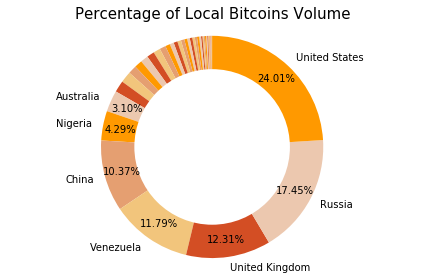

In [81]:
# Specifying the colors of the slices
colors = ['#F2C57C','#D34E24','#ECC8AF', '#FF9900', '#E59F71']
 
fig1, ax1 = plt.subplots()

# Specifying the percentage display and for which values to display (same as with the country names, too many and there is overlap) 
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1.7 else ''


# Creating the donut chart
ax1.pie(sizes, colors = colors, labels=labels, autopct=my_autopct, startangle=90, labeldistance=1.1, pctdistance=.84)

# specifying the title
plt.title("Percentage of Local Bitcoins Volume", fontsize=15)

# Adding empty space to complete donut creation
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')   
plt.tight_layout()
plt.show()

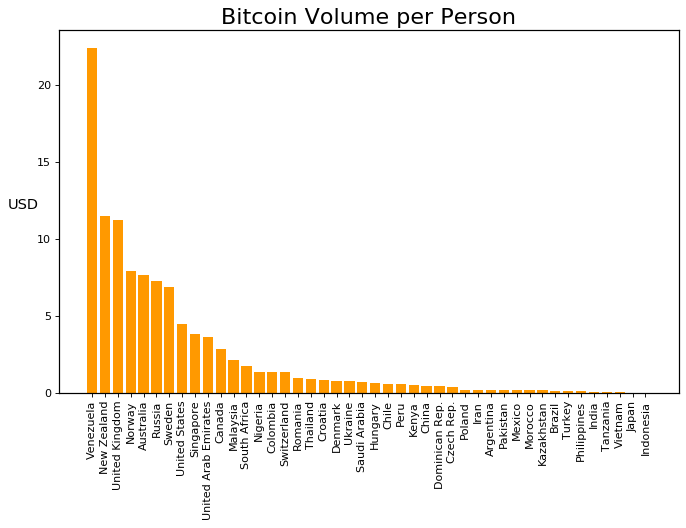

In [82]:
""" Creating a bar chart of Bitcoin volume per person """

# Subsetting the column into a new dataframe and sorting the values
final_df2 = df.sort_values(by=['LB_volume_per_person'], ascending=False)

# Increasing size of the plot
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# Creating barchart
plt.bar(final_df2['Country'], final_df2['LB_volume_per_person'], color='#FF9900')

# Rotating x-axis labels
plt.xticks(rotation='vertical')

# Setting y-axis title
plt.ylabel("USD", rotation=0, labelpad=12, fontsize=13)

# Setting a title
plt.title("Bitcoin Volume per Person", fontsize=20)

plt.show()

In [43]:
# Installing geopanda to create a cloropleth of the same barchart above
pip install geopandas

In [44]:
# Importing geopandas
import geopandas as gpd

# set the filepath and load in a shapefile
fp = 'Countries_WGS84.shp'
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [0]:
# Merging the dataframes on country
merged = map_df.set_index('CNTRY_NAME').join(df.set_index('Country'))

In [0]:
# Dropping rows with null values
merged = merged.dropna()

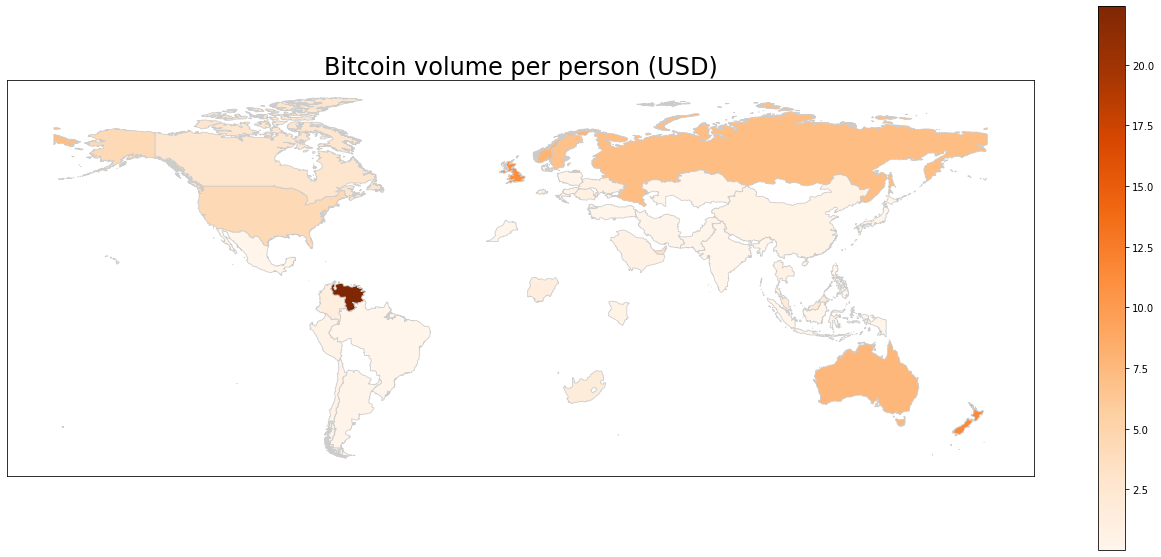

In [47]:
""" Creating the cloropleth """
# set a variable that will call whatever column we want to visualise on the map
variable = 'LB_volume_per_person'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 10))

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(23, 10))

# Removing ticks
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
    top=False)
plt.tick_params(
    axis='y',
    which='both',
    bottom=False,
    labelleft=False,
    left=False)

# Titling
plt.title('Bitcoin volume per person (USD)', fontsize=24)

merged.plot(column=variable, cmap="Oranges",  linewidth=0.8, ax=ax, edgecolor='0.8', legend='True')
plt.show()

In [48]:
# Library to adjust scatterplot text to avoid text overlap on the chart below
pip install https://github.com/Phlya/adjustText/archive/master.zip

  Using cached https://github.com/Phlya/adjustText/archive/master.zip
  Created wheel for adjustText: filename=adjustText-0.7.4-cp36-none-any.whl size=8643 sha256=6b6f98a09db6099c4d32b827d787365dc975b2adad0a7f482c79b631e72cc948
  Stored in directory: /tmp/pip-ephem-wheel-cache-wac7yqha/wheels/7a/56/aa/ee86b18565ad149ba3a5470b55bbc5081701fd0b57141ed055
Successfully built adjustText


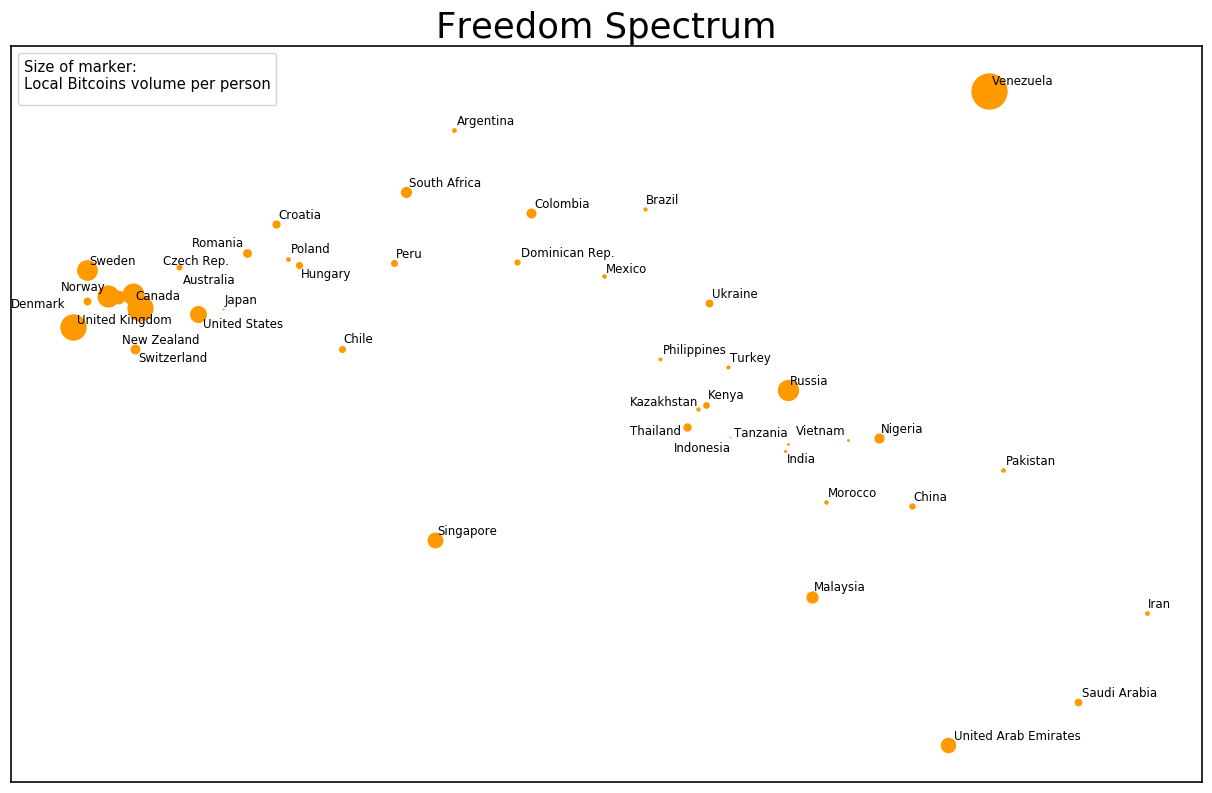

In [104]:
""" Plotting the projected PCA1 and PCA2 values """
# PCA1 and PCA2 of the human freedom index scores with the size of the marker representing the volumes per person from Local Bitcoins
projected_data = np.asarray(B)
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np

# Setting the size of the chart
figure(num=None, figsize=(14.5, 9.2), dpi=106, facecolor='w', edgecolor='k')

# Plotting the points
for i,type in enumerate(List):
    x = projected_data[i][0]
    y = projected_data[i][1]
    plt.scatter(x, y, marker='o', color='#FF9900', s=df['LB_volume_per_person'][i]*25)
    
    

# Plotting the text
texts = [plt.text(projected_data[i][0], projected_data[i][1], List[i], fontsize=8, ha='center', va='center') for i in range(len(List))]
adjust_text(texts)
    
# Using the library to adjust the text
adjust_text(texts)

# Setting ticks
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
    top=False)
plt.tick_params(
    axis='y',
    which='both',
    bottom=False,
    labelleft=False,
    left=False)

plt.rcParams['axes.linewidth'] = 1.1

# Titling the chart
plt.title("Freedom Spectrum", fontsize=24)

# Creating a legend
plt.legend("", "", loc="upper left", title="Size of marker: \nLocal Bitcoins volume per person")

# Removing axis labels
plt.xlabel("")
plt.ylabel("")
plt.show()